<a href="https://colab.research.google.com/github/Avipsa1/UPPP275-Notebooks/blob/main/Mapping_counties_that_are_at_high_fire_risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!sudo apt install python3-rtree

     |████████████████████████████████| 1.0 MB 4.3 MB/s 
     |████████████████████████████████| 6.3 MB 31.6 MB/s 
     |████████████████████████████████| 16.7 MB 236 kB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'sudo apt autoremove' to remove them.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 42 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libspatia

Import all necessary packages

In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import folium

Upload the fire severity zone file for LA county along with the census tract boundaries and demogrpahic information. Read each file separately into dataframes.

In [4]:
census = pd.read_csv("CA_census_tracts.csv")
fires = gpd.read_file("LA_fire_severity_zones.geojson")
tracts = gpd.read_file("tl_2017_06_tract.shp")

Join the census data with the tracts using attribute join

In [5]:
census.head()

,GEOID10,total_pop,median_age,pct_hispanic,pct_white,pct_black,pct_asian,pct_male,pct_single_family_home,med_home_value,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
0,6001437701,3745.0,29.4,59.6,11.7,9.9,303.0,49.7,19.2,310700.0,...,64.3,11.9,15.7,93.8,11.5,35.5,38.6,6,1,Alameda
1,6001437102,4586.0,36.6,34.2,10.1,8.5,1813.0,45.8,28.0,384400.0,...,78.1,10.4,45.5,91.2,22.0,32.9,48.8,6,1,Alameda
2,6001437101,7186.0,40.2,20.6,13.9,5.9,3623.0,49.4,76.1,582400.0,...,75.6,3.1,34.5,90.0,40.0,46.1,42.3,6,1,Alameda
3,6001450752,5854.0,38.4,8.0,22.7,4.3,3514.0,51.2,80.5,1008600.0,...,60.1,1.4,15.9,94.5,65.7,44.2,44.5,6,1,Alameda
4,6001450751,8963.0,36.7,4.8,22.4,1.2,6020.0,48.7,77.4,922500.0,...,59.3,2.7,10.9,78.8,78.4,35.8,50.1,6,1,Alameda


In [6]:
tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,+37.5371514,-122.0081094,"POLYGON ((-122.01721 37.53932, -122.01719 37.5..."
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,+37.5293619,-121.9931002,"POLYGON ((-122.00230 37.52984, -122.00224 37.5..."
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,+34.0175004,-118.1974975,"POLYGON ((-118.20284 34.01966, -118.20283 34.0..."
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,+34.0245059,-118.2142985,"POLYGON ((-118.21963 34.02629, -118.21945 34.0..."
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,+34.0187546,-118.2117956,"POLYGON ((-118.22023 34.02056, -118.22018 34.0..."


In [8]:
#Create a new column called GEOID10 that stores the string GEOID in integer format
tracts['GEOID10'] = pd.to_numeric(tracts['GEOID'])

In [10]:
#Now join census and tracts dataframes with the 'GEOID10' column
census_tracts = tracts.merge(census, on = 'GEOID10', how = 'left')
census_tracts.head()

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,...,pct_commute_drive_alone,pct_below_poverty,pct_college_grad_student,pct_same_residence_year_ago,pct_bachelors_degree,pct_english_only,pct_foreign_born,state,county,county_name
0,06,001,442700,06001442700,4427,Census Tract 4427,G5020,S,1234034,0,...,73.7,1.7,31.8,89.3,49.4,60.3,28.8,6,1,Alameda
1,06,001,442800,06001442800,4428,Census Tract 4428,G5020,S,1278647,0,...,70.1,8.0,38.7,88.7,38.7,50.7,39.5,6,1,Alameda
2,06,037,204920,06037204920,2049.20,Census Tract 2049.20,G5020,S,909972,0,...,86.4,28.3,19.0,91.7,8.7,14.0,39.9,6,37,Los Angeles
3,06,037,205110,06037205110,2051.10,Census Tract 2051.10,G5020,S,286962,0,...,57.4,29.4,20.9,90.8,5.9,6.5,53.1,6,37,Los Angeles
4,06,037,205120,06037205120,2051.20,Census Tract 2051.20,G5020,S,1466129,0,...,72.3,35.5,23.2,91.2,4.8,10.4,47.9,6,37,Los Angeles


In [11]:
census_tracts.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands. British Virgin Islands

In [12]:
fires.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Let us convert the fires dataframe to 4326 crs

In [13]:
fires = fires.to_crs(4326)

Now, let us try and plot the fires dataframe on top of the census tracts

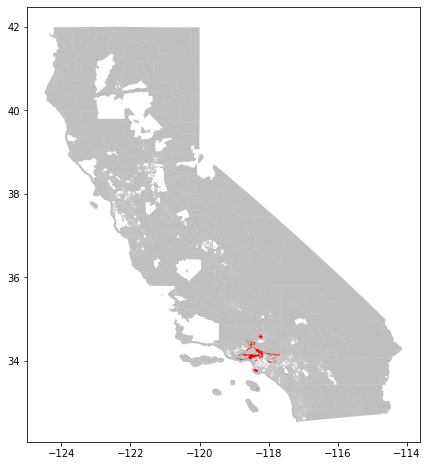

In [18]:
ax1 = census_tracts.plot(color = 'grey', alpha = 0.5, figsize = (8,8))
fires.plot(ax = ax1, color = "red")

It seems that the fires have occurred mostly in the southern part. Let us filter our data for three SCAG counties

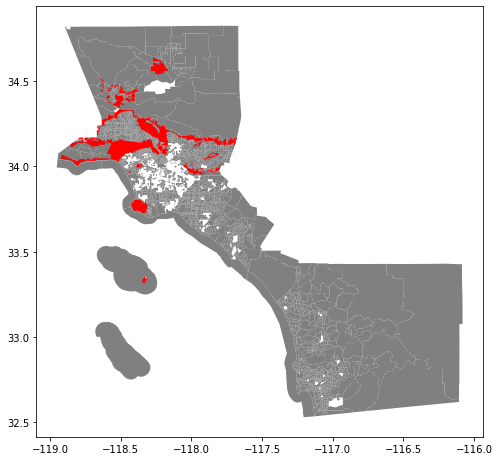

In [28]:
census_tracts_socal = census_tracts.query('county_name in ["Los Angeles", "Orange","San Diego"]')
ax2 = census_tracts_socal.plot(figsize = (8,8), color = "grey")
fires.plot(ax = ax2, color = "red")

Let us extract those census tracts that overlap with the fire severity zones. We can do this using a spatial join using 'intersects' operation.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4269
Right CRS: EPSG:4326

  """Entry point for launching an IPython kernel.


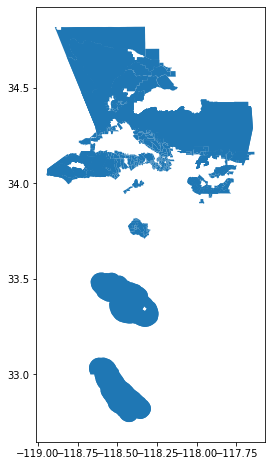

In [44]:
tracts_within_fires = gpd.sjoin(census_tracts, fires, predicate = 'intersects')
tracts_within_fires.plot(figsize = (8,8))

Let us explore what columns we have

In [45]:
tracts_within_fires.columns

Index(['STATEFP', 'COUNTYFP', 'TRACTCE', 'GEOID', 'NAME', 'NAMELSAD', 'MTFCC',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'geometry',
       'GEOID10', 'total_pop', 'median_age', 'pct_hispanic', 'pct_white',
       'pct_black', 'pct_asian', 'pct_male', 'pct_single_family_home',
       'med_home_value', 'med_rooms_per_home', 'pct_built_before_1940',
       'pct_renting', 'rental_vacancy_rate', 'avg_renter_household_size',
       'med_gross_rent', 'med_household_income', 'mean_commute_time',
       'pct_commute_drive_alone', 'pct_below_poverty',
       'pct_college_grad_student', 'pct_same_residence_year_ago',
       'pct_bachelors_degree', 'pct_english_only', 'pct_foreign_born', 'state',
       'county', 'county_name', 'index_right', 'FID', 'OBJECTID_1', 'OBJECTID',
       'FID_c19fhs', 'HAZ_CODE', 'HAZ_CLASS', 'SRA', 'INCORP', 'VH_REC',
       'Shape_Leng', 'Revised', 'Shape__Area', 'Shape__Length'],
      dtype='object')

Now let us see the demographic characteristics in these areas with high fire risk 

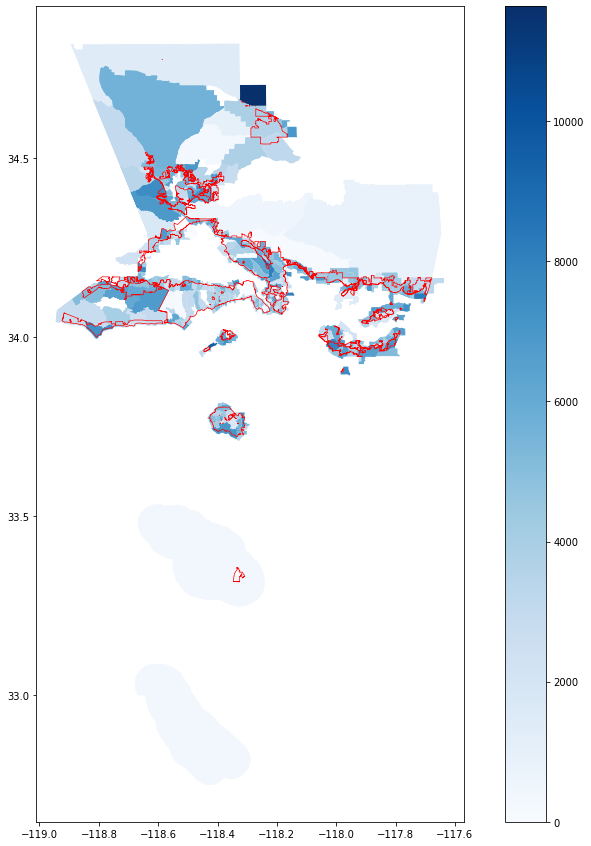

In [54]:
ax3 = tracts_within_fires.plot(column = 'total_pop', cmap = 'Blues', figsize = (15,15), legend = True)
fires.plot(ax = ax3, facecolor="none", edgecolor='red', lw=0.7)

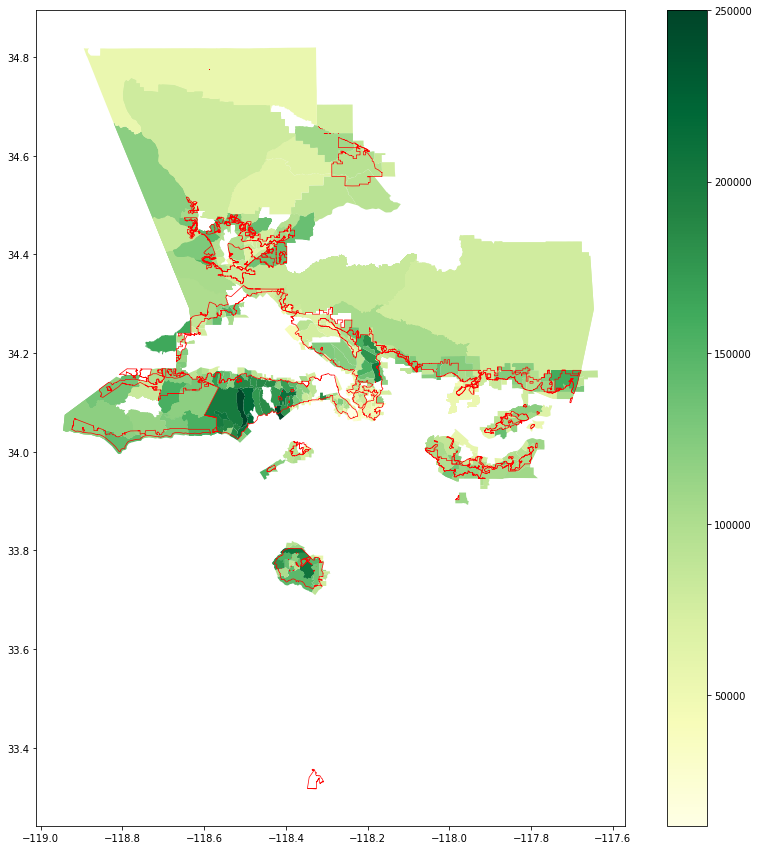

In [59]:
ax3 = tracts_within_fires.plot(column = 'med_household_income', cmap = 'YlGn', figsize = (15,15), legend = True)
fires.plot(ax = ax3, facecolor="none", edgecolor='red', lw=0.7)

Let us explore the distribution of median home price in these areas

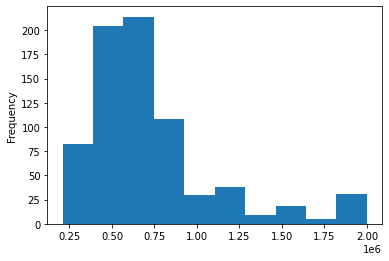

In [64]:
tracts_within_fires['med_home_value'].plot(kind = 'hist')

Let us explore the relationship between the percentage of population belwo poverty in these census tracts by county

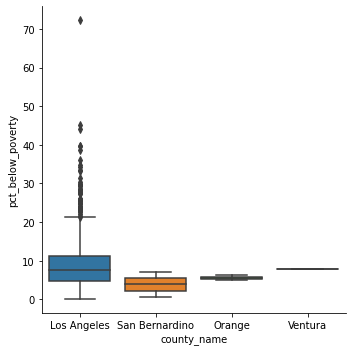

In [66]:
import seaborn as sns
sns.catplot(x="county_name", y="pct_below_poverty", kind="box", data=tracts_within_fires)

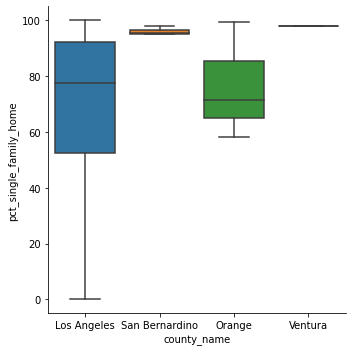

In [68]:
sns.catplot(x="county_name", y="pct_single_family_home", kind="box", data=tracts_within_fires)

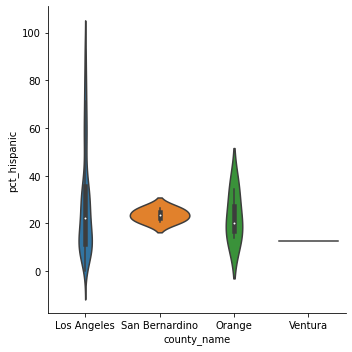

In [69]:
sns.catplot(x="county_name", y="pct_hispanic", kind="violin", data=tracts_within_fires)